# Black friday dataset EDA, feature engineering and preparing data for model implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
# Importing train dataset
df_train = pd.read_csv("./BlackFridayDataset/train.csv")

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Importing test dataset
df_test = pd.read_csv("./BlackFridayDataset/test.csv")

In [5]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
# Combining train and test dataset for feature engineering
df_combined = pd.concat([df_test, df_train])

In [7]:
df_combined

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368.0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371.0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137.0
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365.0


In [8]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [9]:
df_combined.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
df_combined.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
df_combined

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368.0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371.0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137.0
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365.0


In [12]:
# This approach is long and requires multiple columns
pd.get_dummies(df_combined['Gender'])

,F,M
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
550063,0,1
550064,1,0
550065,1,0
550066,1,0


In [13]:
# Handling categorical features: gender
df_combined['Gender'] = df_combined['Gender'].map({'F':0, 'M':1})
df_combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,1,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,1,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,0,26-35,1,C,1,0,4,5.0,12.0,NaN


In [14]:
# Handling categorical features: age
df_combined['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [15]:
# Not a good practice but a way to do categorical encoding 
pd.get_dummies(df_combined['Age'],drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
550063,0,0,0,0,1,0
550064,0,1,0,0,0,0
550065,0,1,0,0,0,0
550066,0,0,0,0,0,1


In [16]:
# Handling categorical features: gender
df_combined['Age'] = df_combined['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7 })
df_combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,1,5,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,1,3,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,0,4,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,0,4,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN


In [17]:
df_combined['City_Category'].unique()

array(['B', 'C', 'A'], dtype=object)

In [18]:
df_city = pd.get_dummies(df_combined['City_Category'], drop_first=True)

In [19]:
df_city.head()

,B,C
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [20]:
df = pd.concat([df_combined,df_city], axis=1)

In [21]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000004,P00128942,1,5,7,B,2,1,1,11.0,NaN,NaN,1,0
1,1000009,P00113442,1,3,17,C,0,0,3,5.0,NaN,NaN,0,1
2,1000010,P00288442,0,4,1,B,4+,1,5,14.0,NaN,NaN,1,0
3,1000010,P00145342,0,4,1,B,4+,1,4,9.0,NaN,NaN,1,0
4,1000011,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN,0,1


In [22]:
df.drop('City_Category', axis=1, inplace=True)

In [23]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000004,P00128942,1,5,7,2,1,1,11.0,NaN,NaN,1,0
1,1000009,P00113442,1,3,17,0,0,3,5.0,NaN,NaN,0,1
2,1000010,P00288442,0,4,1,4+,1,5,14.0,NaN,NaN,1,0
3,1000010,P00145342,0,4,1,4+,1,4,9.0,NaN,NaN,1,0
4,1000011,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [24]:
#Missing Values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [25]:
# Missing values solution
df['Product_Category_2'].unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [26]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [27]:
# Since data is discreet replace missing values with mode
df['Product_Category_2'].mode()[0]

8.0

In [28]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [29]:
df['Product_Category_2'].isnull().sum()

0

In [30]:
df['Product_Category_3'].unique()

array([nan, 12., 15.,  9., 16., 14.,  4.,  3.,  5.,  8., 17., 13., 11.,
       10.,  6., 18.])

In [31]:
df['Product_Category_2'].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [32]:
df['Product_Category_3'].mode()[0]

16.0

In [33]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [34]:
df['Product_Category_3'].isnull().sum()

0

In [35]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000004,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,1000009,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,1000010,P00288442,0,4,1,4+,1,5,14.0,16.0,NaN,1,0
3,1000010,P00145342,0,4,1,4+,1,4,9.0,16.0,NaN,1,0
4,1000011,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [36]:
df.shape

(783667, 13)

In [37]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [38]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

/var/folders/c0/sj969k_x7xs_y65cm0gnh58c0000gn/T/ipykernel_2696/66897005.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [39]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000004,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,1000009,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,1000010,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,1000010,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,1000011,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [40]:
# Convert object into integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [42]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int64  
 12  C                           783667 non-null  int64  
dtypes: float64(3),

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

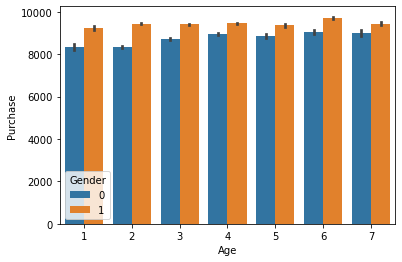

In [44]:
# Visulization of Age vs Purchase including gender
sns.barplot('Age', 'Purchase', hue='Gender', data=df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

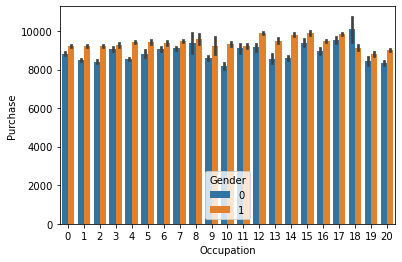

In [45]:
## Visulization of purchase with occupation
sns.barplot('Occupation', 'Purchase', hue='Gender', data=df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

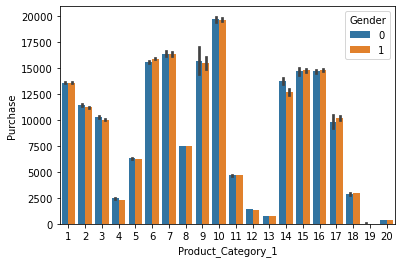

In [46]:
## Visulization of different products WRT to purcahses
sns.barplot('Product_Category_1', 'Purchase', hue='Gender', data=df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

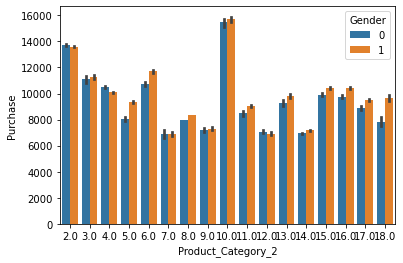

In [47]:
sns.barplot('Product_Category_2', 'Purchase', hue='Gender', data=df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

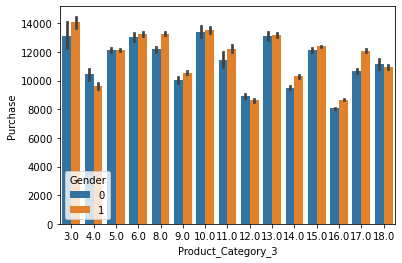

In [48]:
sns.barplot('Product_Category_3', 'Purchase', hue='Gender', data=df)

In [49]:
# Feature Scaling
df_test = df[df['Purchase'].isnull()]

In [50]:
df_train = df[~df['Purchase'].isnull()]

In [51]:
X = df_train.drop("Purchase", axis=1)

In [52]:
X.shape

(550068, 12)

In [53]:
y = df_train['Purchase']

In [54]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
X_train.drop('Product_ID', axis=1, inplace=True)
X_test.drop('Product_ID', axis=1, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
X_train.drop('User_ID', axis=1, inplace=True)
X_test.drop('User_ID', axis=1, inplace=True)

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
